# Expected Values
$$ E[X] = \sum x p(x) $$


$$ E[X] = \int_{-\infty}^{+\infty} x p(x) dx $$

The expected value can be thought of as the center of mass of a distribution. It is the point were all the values of the distribution to the right and left balance out.

[Lecture slides](https://github.com/bcaffo/Caffo-Coursera/blob/master/lecture3.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Example 1
Expected value of a uniform distribution

The following plots demonstrate the expected value of a uniform distrubution and the expected value of a squared random variable from a uniform distribution. When X is squared the center of mass shifts to the left changing the expected (mean) value. The squared X is a new random variable created by squaring the values of X.

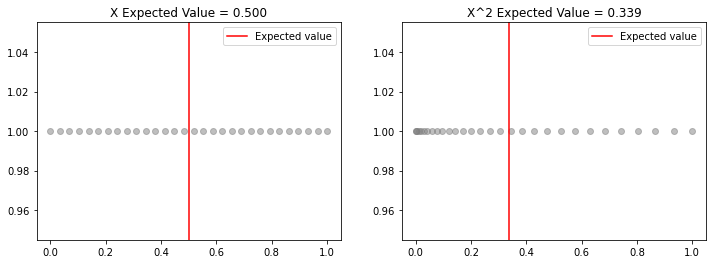

In [2]:
n = 30
x = np.linspace(0, 1, n)
y = np.ones(n)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# E[X]
ax0 = axs[0]
ax0.scatter(x=x, y=y, color='gray', alpha=0.5)
ax0.set_title('X Expected Value = {:.3f}'.format(x.mean()))
ax0.axvline(x=x.mean(), color='red', label='Expected value')
ax0.legend()

# E[X^2]
ax1 = axs[1]
ax1.scatter(x=x**2, y=y, color='gray', alpha=0.5)
ax1.set_title('X^2 Expected Value = {:.3f}'.format((x**2).mean()))
ax1.axvline(x=(x**2).mean(), color='red', label='Expected value')
ax1.legend()

plt.show()

Computing $E[X^2]$ using the definition of expected values. [See this StackExchange](https://math.stackexchange.com/questions/306659/computing-the-expectation-of-the-square-of-a-random-variable-textex2)

* Discrete case:
$$ E[X^n] = \sum_i x^n p(x) $$

* Continuous case:
$$ E[X^n] = \int_{0}^{1} x^n f(x) dx  $$

In [3]:
# Computing E[x**2] manually

# 1. As a discrete variable
# Probability of each value in the discrete uniform distribution
y = 1./len(x)
exp_val = np.sum(x**2 * y)
print('Expected value (discrete) = {:.3f}'.format(exp_val))

# 2. As a continuous variable (f(x) = 1)
exp_val_fun = lambda x: 1 * x**3 / 3.
exp_val = exp_val_fun(1) - exp_val_fun(0)
print('Expected value (continuos) = {:.3f}'.format(exp_val))

Expected value (discrete) = 0.339
Expected value (continuos) = 0.333


Histograms of the two previous cases

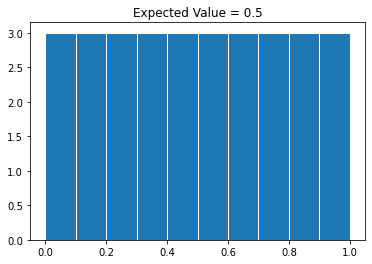

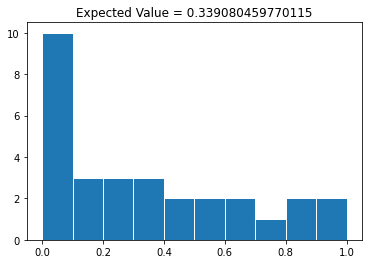

In [4]:
plt.hist(x, edgecolor='w')
plt.title('Expected Value = {}'.format(x.mean()))
plt.show()

plt.hist(x**2, edgecolor='w')
plt.title('Expected Value = {}'.format((x**2).mean()))
plt.show()

### Example 2:
Expected value of a dice roll, the sum of two dice rolls, and the average of two dice rolls

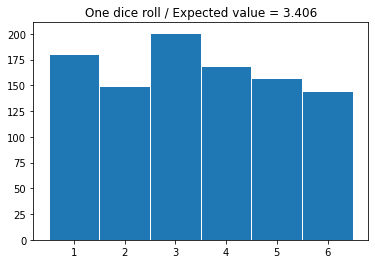

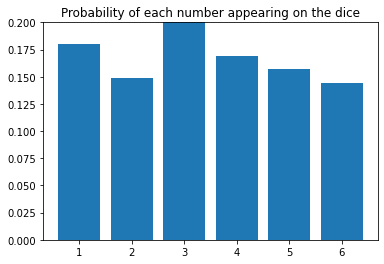

In [5]:
n = 1000

# Rolling a dice n times
x = np.random.randint(1, 7, n)

# Computing the probability of each number appearing on the dice
y = [(x==i).mean() for i in range(1,7)]

bins = np.linspace(0.5, 6.5, 7)
plt.hist(x, edgecolor='w', bins = bins)
plt.title('One dice roll / Expected value = {}'.format(x.mean()))

plt.show()

plt.bar(np.arange(1,7), y)
plt.title('Probability of each number appearing on the dice')
plt.ylim(0, 0.2)
plt.show()

In [6]:
# Comuting the expected value using the definition
# E[X] = sum(x p(x))
exp_val = np.sum([x*p for x, p in zip(np.arange(1, 7), y)])

print('Expected value: {}'.format(exp_val))

Expected value: 3.406


**Rolling two die and summing their values**:

$$ E[X1 + X2] = E[X1] + E[X2] = 3.5 + 3.5 = 7 $$

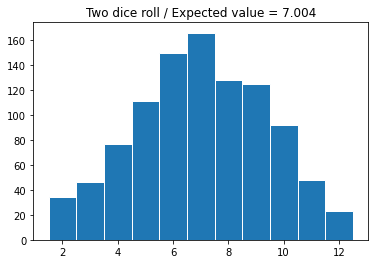

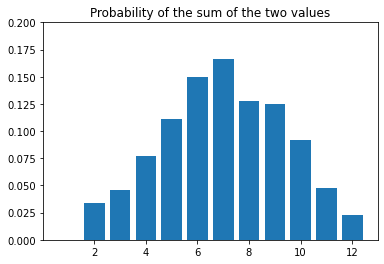

In [7]:
n = 1000

# Rolling two die n times
x1 = np.random.randint(1, 7, n)
x2 = np.random.randint(1, 7, n)

x = x1 + x2

# Computing the probability of the sum of the two values appearing on both die
y = [(x==i).sum()/x.shape[0] for i in range(1,13)]

bins = np.linspace(1.5, 12.5, 12)
plt.hist(x, edgecolor='w', bins = bins)
plt.title('Two dice roll / Expected value = {}'.format(x.mean()))

plt.show()

plt.bar(np.arange(1,13), y)
plt.title('Probability of the sum of the two values')
plt.ylim(0, 0.2)
plt.show()

**Average of two die rolls**:

$$ E[(X1+X2)/2] = 0.5 \left(E[X1] + E[X2]\right) = 3.5 $$

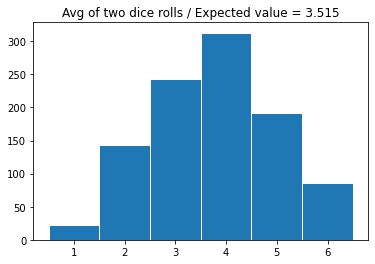

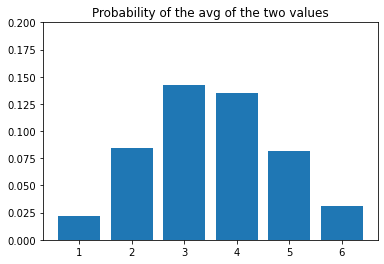

In [8]:
n = 1000

# Rolling two die n times
x1 = np.random.randint(1, 7, n)
x2 = np.random.randint(1, 7, n)

x = (x1 + x2) * 0.5

# Computing the probability of the sum of the two values appearing on both die
y = [(x==i).sum()/x.shape[0] for i in range(1,7)]

bins = np.linspace(0.5, 6.5, 7)
plt.hist(x, edgecolor='w', bins = bins)
plt.title('Avg of two dice rolls / Expected value = {}'.format(x.mean()))

plt.show()

plt.bar(np.arange(1,7), y)
plt.title('Probability of the avg of the two values')
plt.ylim(0, 0.2)
plt.show()

This stays true for any sum (n) of random variables having equal expected values:
$$ E\left[ \frac{1}{n} \sum^{n}_{1} X_i \right] = \frac{1}{n} E\left[ \sum^{n}_{1} X_i \right] = \frac{1}{n} \sum^{n}_{1} E\left[ X_i \right] = \mu$$
Where:
$$ \mu = E[X_i] $$
(All the summed random variables have the same mean)